In [37]:
# Import Dependencies
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
# Read Crime Data
crime_data = pd.read_csv("p_data.csv")

# Read CTA Data
cta_data = pd.read_csv("CTA_-_Ridership_-_Daily_Boarding_Totals.csv")

# Rename CTA Columns
cta_data.columns = ["Date", "Day Type", "Bus", "Rail Boardings", "Total Rides"]

In [4]:
# Display CTA Data
cta_data

,Date,Day Type,Bus,Rail Boardings,Total Rides
0,01/01/2001,U,297192,126455,423647
1,01/02/2001,W,780827,501952,1282779
2,01/03/2001,W,824923,536432,1361355
3,01/04/2001,W,870021,550011,1420032
4,01/05/2001,W,890426,557917,1448343
...,...,...,...,...,...
7056,02/25/2020,W,781725,693749,1475474
7057,02/26/2020,W,756936,682501,1439437
7058,02/27/2020,W,778992,698886,1477878
7059,02/28/2020,W,786008,665937,1451945


In [5]:
# Identify Incomplete Rows
# cta_data.count()

In [6]:
# Display Crime Data
# crime_data

In [7]:
# Delete Unwanted Columns
del crime_data["ID"]
del crime_data["Case Number"]
del crime_data["IUCR"]
del crime_data["Beat"]
del crime_data["District"]
del crime_data["Ward"]
del crime_data["Community Area"]
del crime_data["FBI Code"]
del crime_data["X Coordinate"]
del crime_data["Y Coordinate"]
del crime_data["Updated On"]

In [8]:
# Identify Incomplete Rows
crime_data.count()

Date                    110580
Block                   110580
Primary Type            110580
Description             110580
Location Description    110580
Arrest                  110580
Domestic                110580
Year                    110580
Latitude                109808
Longitude               109808
Location                109808
dtype: int64

In [9]:
# Drop All Rows With Missing Information
crime_data = crime_data.dropna(how='any')

In [10]:
# Verify Dropped Rows
crime_data.count()

Date                    109808
Block                   109808
Primary Type            109808
Description             109808
Location Description    109808
Arrest                  109808
Domestic                109808
Year                    109808
Latitude                109808
Longitude               109808
Location                109808
dtype: int64

In [11]:
# Display Crime Data
crime_data

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Year,Latitude,Longitude,Location
0,04/07/2020,002XX S STATE ST,HOMICIDE,FIRST DEGREE MURDER,"CTA ""L"" PLATFORM",True,False,2020,41.878639,-87.627691,"(41.878638996, -87.627691486)"
1,07/09/2017,000XX W 95TH ST,HOMICIDE,FIRST DEGREE MURDER,"CTA ""L"" PLATFORM",True,False,2017,41.721627,-87.624485,"(41.721627204, -87.624485177)"
2,07/13/2019,001XX W CERMAK RD,HOMICIDE,FIRST DEGREE MURDER,"CTA ""L"" PLATFORM",True,False,2019,41.852868,-87.630915,"(41.852868298, -87.63091491)"
3,03/29/2011,009XX W FULLERTON AVE,HOMICIDE,FIRST DEGREE MURDER,"CTA ""L"" PLATFORM",True,False,2011,41.925398,-87.652311,"(41.925398449, -87.652311296)"
4,03/16/2013,003XX E 43RD ST,HOMICIDE,FIRST DEGREE MURDER,"CTA ""L"" PLATFORM",True,False,2013,41.816599,-87.619114,"(41.816598679, -87.619113763)"
...,...,...,...,...,...,...,...,...,...,...,...
110575,03/11/2015,004XX S WESTERN AVE,THEFT,$500 AND UNDER,CTA TRAIN,False,True,2015,41.875073,-87.686256,"(41.875073359, -87.68625556)"
110576,03/16/2015,001XX W LAKE ST,THEFT,POCKET-PICKING,CTA TRAIN,True,False,2015,41.885741,-87.631712,"(41.885741029, -87.631711749)"
110577,03/16/2015,001XX W LAKE ST,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,CTA TRAIN,False,False,2015,41.885741,-87.631712,"(41.885741029, -87.631711749)"
110578,03/17/2015,100XX W OHARE ST,THEFT,PURSE-SNATCHING,CTA TRAIN,False,False,2015,41.976290,-87.905227,"(41.976290414, -87.905227221)"


In [12]:
# Merge CTA and Crime Data
data_complete = pd.merge(cta_data, crime_data, how="outer", on=["Date", "Date"])

# Convert to DataFrame
project_data = pd.DataFrame(data_complete)

# Display New DataFrame
project_data

,Date,Day Type,Bus,Rail Boardings,Total Rides,Block,Primary Type,Description,Location Description,Arrest,Domestic,Year,Latitude,Longitude,Location
0,01/01/2001,U,297192.0,126455.0,423647.0,002XX N LARAMIE AV,CRIMINAL DAMAGE,TO STATE SUP PROP,CTA BUS,False,False,2001,41.884383,-87.755360,"(41.884382699, -87.755359535)"
1,01/01/2001,U,297192.0,126455.0,423647.0,046XX N BROADWAY,ROBBERY,STRONGARM - NO WEAPON,CTA PLATFORM,False,False,2001,41.965917,-87.657969,"(41.965917251, -87.657969065)"
2,01/01/2001,U,297192.0,126455.0,423647.0,015XX W JARVIS AV,CRIMINAL DAMAGE,TO PROPERTY,CTA PLATFORM,True,False,2001,42.015918,-87.669069,"(42.015918091, -87.669068759)"
3,01/01/2001,U,297192.0,126455.0,423647.0,003XX N STATE ST,ROBBERY,STRONGARM - NO WEAPON,CTA PLATFORM,False,False,2001,41.888112,-87.628175,"(41.888112342, -87.628174848)"
4,01/01/2001,U,297192.0,126455.0,423647.0,033XX W BELMONT AV,CRIMINAL DAMAGE,TO VEHICLE,CTA PLATFORM,False,False,2001,41.939177,-87.712270,"(41.939176878, -87.712269825)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110929,04/10/2020,NaN,NaN,NaN,NaN,002XX S STATE ST,NARCOTICS,POSSESS - CRACK,CTA PLATFORM,True,False,2020,41.878639,-87.627691,"(41.878638996, -87.627691486)"
110930,04/10/2020,NaN,NaN,NaN,NaN,032XX W LAKE ST,BATTERY,SIMPLE,CTA STATION,False,False,2020,41.884389,-87.706866,"(41.884389103, -87.706866213)"
110931,04/10/2020,NaN,NaN,NaN,NaN,001XX W CERMAK RD,ASSAULT,SIMPLE,CTA TRAIN,True,False,2020,41.852868,-87.630915,"(41.852868298, -87.63091491)"
110932,04/10/2020,NaN,NaN,NaN,NaN,046XX W MONTROSE AVE,THEFT,POCKET-PICKING,CTA TRAIN,False,False,2020,41.960778,-87.742731,"(41.960778173, -87.742731337)"


In [13]:
# Identify Incomplete Rows
project_data.count()

Date                    110934
Day Type                110500
Bus                     110500
Rail Boardings          110500
Total Rides             110500
Block                   110934
Primary Type            110934
Description             110934
Location Description    110934
Arrest                  110934
Domestic                110934
Year                    110934
Latitude                110934
Longitude               110934
Location                110934
dtype: int64

In [14]:
# Assign Date Column to a Variable
all_dates = project_data["Date"]

# Convert All Dates to a Datetime 
[dt.datetime.strptime(x, "%m/%d/%Y") for x in all_dates]

# Replace Date Column with Datetime Values
project_data["Date"] = pd.to_datetime(all_dates)

# Display Modified DataFrame
project_data

,Date,Day Type,Bus,Rail Boardings,Total Rides,Block,Primary Type,Description,Location Description,Arrest,Domestic,Year,Latitude,Longitude,Location
0,2001-01-01,U,297192.0,126455.0,423647.0,002XX N LARAMIE AV,CRIMINAL DAMAGE,TO STATE SUP PROP,CTA BUS,False,False,2001,41.884383,-87.755360,"(41.884382699, -87.755359535)"
1,2001-01-01,U,297192.0,126455.0,423647.0,046XX N BROADWAY,ROBBERY,STRONGARM - NO WEAPON,CTA PLATFORM,False,False,2001,41.965917,-87.657969,"(41.965917251, -87.657969065)"
2,2001-01-01,U,297192.0,126455.0,423647.0,015XX W JARVIS AV,CRIMINAL DAMAGE,TO PROPERTY,CTA PLATFORM,True,False,2001,42.015918,-87.669069,"(42.015918091, -87.669068759)"
3,2001-01-01,U,297192.0,126455.0,423647.0,003XX N STATE ST,ROBBERY,STRONGARM - NO WEAPON,CTA PLATFORM,False,False,2001,41.888112,-87.628175,"(41.888112342, -87.628174848)"
4,2001-01-01,U,297192.0,126455.0,423647.0,033XX W BELMONT AV,CRIMINAL DAMAGE,TO VEHICLE,CTA PLATFORM,False,False,2001,41.939177,-87.712270,"(41.939176878, -87.712269825)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110929,2020-04-10,NaN,NaN,NaN,NaN,002XX S STATE ST,NARCOTICS,POSSESS - CRACK,CTA PLATFORM,True,False,2020,41.878639,-87.627691,"(41.878638996, -87.627691486)"
110930,2020-04-10,NaN,NaN,NaN,NaN,032XX W LAKE ST,BATTERY,SIMPLE,CTA STATION,False,False,2020,41.884389,-87.706866,"(41.884389103, -87.706866213)"
110931,2020-04-10,NaN,NaN,NaN,NaN,001XX W CERMAK RD,ASSAULT,SIMPLE,CTA TRAIN,True,False,2020,41.852868,-87.630915,"(41.852868298, -87.63091491)"
110932,2020-04-10,NaN,NaN,NaN,NaN,046XX W MONTROSE AVE,THEFT,POCKET-PICKING,CTA TRAIN,False,False,2020,41.960778,-87.742731,"(41.960778173, -87.742731337)"


In [17]:
# Filter Out Data From After 2019
project_data = project_data[project_data["Date"].dt.year <= 2019]

# Display Modified DataFrame
project_data

,Date,Day Type,Bus,Rail Boardings,Total Rides,Block,Primary Type,Description,Location Description,Arrest,Domestic,Year,Latitude,Longitude,Location
0,2001-01-01,U,297192.0,126455.0,423647.0,002XX N LARAMIE AV,CRIMINAL DAMAGE,TO STATE SUP PROP,CTA BUS,False,False,2001,41.884383,-87.755360,"(41.884382699, -87.755359535)"
1,2001-01-01,U,297192.0,126455.0,423647.0,046XX N BROADWAY,ROBBERY,STRONGARM - NO WEAPON,CTA PLATFORM,False,False,2001,41.965917,-87.657969,"(41.965917251, -87.657969065)"
2,2001-01-01,U,297192.0,126455.0,423647.0,015XX W JARVIS AV,CRIMINAL DAMAGE,TO PROPERTY,CTA PLATFORM,True,False,2001,42.015918,-87.669069,"(42.015918091, -87.669068759)"
3,2001-01-01,U,297192.0,126455.0,423647.0,003XX N STATE ST,ROBBERY,STRONGARM - NO WEAPON,CTA PLATFORM,False,False,2001,41.888112,-87.628175,"(41.888112342, -87.628174848)"
4,2001-01-01,U,297192.0,126455.0,423647.0,033XX W BELMONT AV,CRIMINAL DAMAGE,TO VEHICLE,CTA PLATFORM,False,False,2001,41.939177,-87.712270,"(41.939176878, -87.712269825)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109507,2019-12-31,W,511289.0,431677.0,942966.0,0000X E ROOSEVELT RD,BATTERY,SIMPLE,CTA STATION,False,False,2019,41.867428,-87.626269,"(41.867428235, -87.626269143)"
109508,2019-12-31,W,511289.0,431677.0,942966.0,011XX W GRANVILLE AVE,THEFT,OVER $500,CTA TRAIN,False,False,2019,41.994568,-87.659057,"(41.994567578, -87.65905678)"
109509,2019-12-31,W,511289.0,431677.0,942966.0,0000X N DEARBORN ST,THEFT,POCKET-PICKING,CTA TRAIN,False,False,2019,41.882382,-87.629413,"(41.882381731, -87.629412971)"
109510,2019-12-31,W,511289.0,431677.0,942966.0,0000X N DEARBORN ST,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,CTA TRAIN,False,False,2019,41.882382,-87.629413,"(41.882381731, -87.629412971)"


In [18]:
# Verify Complete Rows
project_data.count()

Date                    109512
Day Type                109512
Bus                     109512
Rail Boardings          109512
Total Rides             109512
Block                   109512
Primary Type            109512
Description             109512
Location Description    109512
Arrest                  109512
Domestic                109512
Year                    109512
Latitude                109512
Longitude               109512
Location                109512
dtype: int64

In [20]:
# Sort CTA Data by L Ridership Total
highest_l_boarding = cta_data.sort_values("Rail Boardings", ascending=False)

# Isolate Only Date Column
highest_l_boarding = highest_l_boarding["Date"]

# Display Most Popular Days to Ride L
highest_l_boarding.head(50)

5850    11/04/2016
5753    10/28/2016
5338    06/18/2015
2740    07/03/2008
4592    06/28/2013
5866    11/03/2016
5454    10/21/2015
5758    10/07/2016
5470    10/20/2015
5476    10/13/2015
5447    09/11/2015
5371    07/31/2015
5687    07/29/2016
5749    07/28/2016
5456    09/25/2015
5809    09/15/2016
6484    08/02/2018
5450    10/15/2015
5460    10/16/2015
5425    10/09/2015
5040    09/19/2014
5478    10/07/2015
5472    09/15/2015
5708    06/10/2016
5431    09/18/2015
5443    10/22/2015
5493    11/05/2015
5406    07/10/2015
5437    09/17/2015
5464    10/08/2015
5039    09/18/2014
2374    07/03/2007
5424    10/01/2015
5067    10/16/2014
6161    10/19/2017
6540    09/27/2018
3448    06/11/2010
6547    10/04/2018
5451    10/14/2015
5068    10/17/2014
5825    09/16/2016
5872    11/02/2016
5448    09/22/2015
5498    11/04/2015
5432    09/16/2015
5428    10/30/2015
5061    10/10/2014
5060    10/09/2014
6147    09/14/2017
5477    09/23/2015
Name: Date, dtype: object

In [21]:
# Sort CTA Data by L Ridership Total
lowest_l_boarding = cta_data.sort_values("Rail Boardings", ascending=True)

# Isolate Only Date Column
lowest_l_boarding = lowest_l_boarding["Date"]

# Display Least Popular Days to Ride L
lowest_l_boarding

1454    12/25/2004
358     12/25/2001
723     12/25/2002
6665    01/30/2019
1088    12/25/2003
           ...    
4592    06/28/2013
2740    07/03/2008
5338    06/18/2015
5753    10/28/2016
5850    11/04/2016
Name: Date, Length: 7061, dtype: object

In [22]:
# Sort CTA Data by Bus Ridership Total
highest_bus_boarding = cta_data.sort_values("Bus", ascending=False)

# Isolate Only Date Column
highest_bus_boarding = highest_bus_boarding["Date"]

# Display Most Popular Days to Ride Bus
highest_bus_boarding

2832    10/03/2008
2830    10/01/2008
2831    10/02/2008
2863    11/03/2008
2808    09/09/2008
           ...    
6275    01/01/2018
5892    12/25/2016
6629    12/25/2018
6262    12/25/2017
6665    01/30/2019
Name: Date, Length: 7061, dtype: object

In [23]:
# Sort CTA Data by Bus Ridership Total
lowest_bus_boarding = cta_data.sort_values("Bus", ascending=True)

# Isolate Only Date Column
lowest_bus_boarding = lowest_bus_boarding["Date"]

# Display Least Popular Days to Ride Bus
lowest_bus_boarding

6665    01/30/2019
6262    12/25/2017
6629    12/25/2018
5892    12/25/2016
6275    01/01/2018
           ...    
2808    09/09/2008
2863    11/03/2008
2831    10/02/2008
2830    10/01/2008
2832    10/03/2008
Name: Date, Length: 7061, dtype: object

In [24]:
# Sort CTA Data by Total Ridership
highest_total_boarding = cta_data.sort_values("Total Rides", ascending=False)

# Isolate Only Date Column
highest_total_boarding = highest_total_boarding["Date"]

# Display Most Popular Days to Ride CTA
highest_total_boarding

2740    07/03/2008
5850    11/04/2016
2864    11/04/2008
4324    10/03/2012
2830    10/01/2008
           ...    
6629    12/25/2018
358     12/25/2001
1454    12/25/2004
6262    12/25/2017
6665    01/30/2019
Name: Date, Length: 7061, dtype: object

In [26]:
# Sort CTA Data by Total Ridership
lowest_total_boarding = cta_data.sort_values("Total Rides", ascending=True)

# Isolate Only Date Column
lowest_total_boarding = lowest_total_boarding["Date"]

# Display Most Popular Days to Ride CTA
lowest_total_boarding

6665    01/30/2019
6262    12/25/2017
1454    12/25/2004
358     12/25/2001
6629    12/25/2018
           ...    
2830    10/01/2008
4324    10/03/2012
2864    11/04/2008
5850    11/04/2016
2740    07/03/2008
Name: Date, Length: 7061, dtype: object

In [27]:
# Investiigate Crime Count for Each Location Description
project_data["Location Description"].value_counts()

CTA PLATFORM                   37634
CTA TRAIN                      26476
CTA BUS                        22801
CTA GARAGE / OTHER PROPERTY    10309
CTA BUS STOP                    6880
CTA STATION                     5250
CTA TRACKS - RIGHT OF WAY        150
CTA "L" PLATFORM                   5
CTA PROPERTY                       4
CTA "L" TRAIN                      2
CTA SUBWAY STATION                 1
Name: Location Description, dtype: int64

In [28]:
# Assign All Location Description Column Values to a Variable
cta_platform = project_data[project_data["Location Description"] == "CTA PLATFORM"]
cta_train = project_data[project_data["Location Description"] == "CTA TRAIN"]
cta_bus = project_data[project_data["Location Description"] == "CTA BUS"]
cta_garage_op = project_data[project_data["Location Description"] == "CTA GARAGE / OTHER PROPERTY"]
cta_bus_stop = project_data[project_data["Location Description"] == "CTA BUS STOP"]
cta_station = project_data[project_data["Location Description"] == "CTA STATION"]
cta_tracks_row = project_data[project_data["Location Description"] == "CTA TRACKS - RIGHT OF WAY"]
cta_l_platform = project_data[project_data["Location Description"] == 'CTA "L" PLATFORM']
cta_property = project_data[project_data["Location Description"] == "CTA PROPERTY"]
cta_l_train = project_data[project_data["Location Description"] == 'CTA "L" TRAIN']
cta_subway_station = project_data[project_data["Location Description"] == "CTA SUBWAY STATION"]

In [29]:
# Create a List to Hold Location Description Values
p_type = [cta_platform, cta_train, cta_bus, cta_garage_op, cta_bus_stop, cta_station, cta_tracks_row, cta_l_platform, cta_property, cta_l_train, cta_subway_station]

# Create a List to Hold Location Description Value Names
location_description  = ["CTA PLATFORM", "CTA TRAIN", "CTA BUS", "CTA GARAGE / OTHER PROPERTY", "CTA BUS STOP", "CTA STATION", "CTA TRACKS - RIGHT OF WAY", 'CTA "L" PLATFORM', "CTA PROPERTY", 'CTA "L" TRAIN', "CTA SUBWAY STATION"]

# Create a For Loop to Display Primary Crime Type
for x in range(11):
    print(f"LOCATION DESCRIPTION: {location_description[x]}")
    print("PRIMARY CRIME TYPE:")
    print(p_type[x]["Primary Type"].value_counts())

LOCATION DESCRIPTION: CTA PLATFORM
PRIMARY CRIME TYPE:
DECEPTIVE PRACTICE                  12669
THEFT                                6056
NARCOTICS                            4550
BATTERY                              4001
CRIMINAL TRESPASS                    2689
CRIMINAL DAMAGE                      2506
ROBBERY                              2357
ASSAULT                              1458
PUBLIC PEACE VIOLATION                314
SEX OFFENSE                           245
WEAPONS VIOLATION                     221
OTHER OFFENSE                         188
LIQUOR LAW VIOLATION                  129
INTERFERENCE WITH PUBLIC OFFICER      106
CRIM SEXUAL ASSAULT                    26
GAMBLING                               23
BURGLARY                               22
PROSTITUTION                           19
OFFENSE INVOLVING CHILDREN             16
STALKING                               14
KIDNAPPING                              9
ARSON                                   5
PUBLIC INDECENCY     

In [30]:
# Assign All Years to a Variable
year_2001 = project_data[project_data["Year"] == 2001]
year_2002 = project_data[project_data["Year"] == 2002]
year_2003 = project_data[project_data["Year"] == 2003]
year_2004 = project_data[project_data["Year"] == 2004]
year_2005 = project_data[project_data["Year"] == 2005]
year_2006 = project_data[project_data["Year"] == 2006]
year_2007 = project_data[project_data["Year"] == 2007]
year_2008 = project_data[project_data["Year"] == 2008]
year_2009 = project_data[project_data["Year"] == 2009]
year_2010 = project_data[project_data["Year"] == 2010]
year_2011 = project_data[project_data["Year"] == 2011]
year_2012 = project_data[project_data["Year"] == 2012]
year_2013 = project_data[project_data["Year"] == 2013]
year_2014 = project_data[project_data["Year"] == 2014]
year_2015 = project_data[project_data["Year"] == 2015]
year_2016 = project_data[project_data["Year"] == 2016]
year_2017 = project_data[project_data["Year"] == 2017]
year_2018 = project_data[project_data["Year"] == 2018]
year_2019 = project_data[project_data["Year"] == 2019]

In [47]:
year_2001

,Date,Day Type,Bus,Rail Boardings,Total Rides,Block,Primary Type,Description,Location Description,Arrest,Domestic,Year,Latitude,Longitude,Location
0,2001-01-01,U,297192.0,126455.0,423647.0,002XX N LARAMIE AV,CRIMINAL DAMAGE,TO STATE SUP PROP,CTA BUS,False,False,2001,41.884383,-87.755360,"(41.884382699, -87.755359535)"
1,2001-01-01,U,297192.0,126455.0,423647.0,046XX N BROADWAY,ROBBERY,STRONGARM - NO WEAPON,CTA PLATFORM,False,False,2001,41.965917,-87.657969,"(41.965917251, -87.657969065)"
2,2001-01-01,U,297192.0,126455.0,423647.0,015XX W JARVIS AV,CRIMINAL DAMAGE,TO PROPERTY,CTA PLATFORM,True,False,2001,42.015918,-87.669069,"(42.015918091, -87.669068759)"
3,2001-01-01,U,297192.0,126455.0,423647.0,003XX N STATE ST,ROBBERY,STRONGARM - NO WEAPON,CTA PLATFORM,False,False,2001,41.888112,-87.628175,"(41.888112342, -87.628174848)"
4,2001-01-01,U,297192.0,126455.0,423647.0,033XX W BELMONT AV,CRIMINAL DAMAGE,TO VEHICLE,CTA PLATFORM,False,False,2001,41.939177,-87.712270,"(41.939176878, -87.712269825)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5267,2001-12-30,U,306871.0,160102.0,466973.0,075XX N HERMITAGE AV,CRIMINAL TRESPASS,TO LAND,CTA TRAIN,True,False,2001,42.018749,-87.673603,"(42.018748791, -87.67360257)"
5268,2001-12-31,W,650794.0,321388.0,972182.0,005XX S KEDZIE AV,PUBLIC PEACE VIOLATION,BOMB THREAT,CTA PLATFORM,False,False,2001,41.873712,-87.706067,"(41.87371236, -87.70606724)"
5269,2001-12-31,W,650794.0,321388.0,972182.0,009XX W ADDISON ST,SEX OFFENSE,PUBLIC INDECENCY,CTA PLATFORM,True,False,2001,41.947358,-87.653765,"(41.947358059, -87.653764882)"
5270,2001-12-31,W,650794.0,321388.0,972182.0,098XX S STATE ST,CRIMINAL DAMAGE,TO PROPERTY,CTA TRAIN,False,False,2001,41.716576,-87.622885,"(41.71657601, -87.622885116)"


In [31]:
# Example DO NOT EDIT!
# Filter for a Single Month Example
january_2001 = year_2001[year_2001["Date"].dt.month == 1]

# Display Example
january_2001

,Date,Day Type,Bus,Rail Boardings,Total Rides,Block,Primary Type,Description,Location Description,Arrest,Domestic,Year,Latitude,Longitude,Location
0,2001-01-01,U,297192.0,126455.0,423647.0,002XX N LARAMIE AV,CRIMINAL DAMAGE,TO STATE SUP PROP,CTA BUS,False,False,2001,41.884383,-87.755360,"(41.884382699, -87.755359535)"
1,2001-01-01,U,297192.0,126455.0,423647.0,046XX N BROADWAY,ROBBERY,STRONGARM - NO WEAPON,CTA PLATFORM,False,False,2001,41.965917,-87.657969,"(41.965917251, -87.657969065)"
2,2001-01-01,U,297192.0,126455.0,423647.0,015XX W JARVIS AV,CRIMINAL DAMAGE,TO PROPERTY,CTA PLATFORM,True,False,2001,42.015918,-87.669069,"(42.015918091, -87.669068759)"
3,2001-01-01,U,297192.0,126455.0,423647.0,003XX N STATE ST,ROBBERY,STRONGARM - NO WEAPON,CTA PLATFORM,False,False,2001,41.888112,-87.628175,"(41.888112342, -87.628174848)"
4,2001-01-01,U,297192.0,126455.0,423647.0,033XX W BELMONT AV,CRIMINAL DAMAGE,TO VEHICLE,CTA PLATFORM,False,False,2001,41.939177,-87.712270,"(41.939176878, -87.712269825)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,2001-01-31,W,999392.0,610508.0,1609900.0,051XX S PULASKI RD,DECEPTIVE PRACTICE,THEFT OF LABOR/SERVICES,CTA PLATFORM,True,False,2001,41.800136,-87.723509,"(41.800136399, -87.723509219)"
532,2001-01-31,W,999392.0,610508.0,1609900.0,012XX N CLARK ST,ROBBERY,ARMED: OTHER DANGEROUS WEAPON,CTA PLATFORM,True,False,2001,41.903992,-87.631596,"(41.903992238, -87.63159645)"
533,2001-01-31,W,999392.0,610508.0,1609900.0,0000X S DEARBORN ST,THEFT,$500 AND UNDER,CTA TRAIN,True,False,2001,41.881041,-87.629229,"(41.881041415, -87.629229386)"
534,2001-01-31,W,999392.0,610508.0,1609900.0,005XX N STATE ST,DECEPTIVE PRACTICE,THEFT OF LABOR/SERVICES,CTA TRAIN,True,False,2001,41.891632,-87.627923,"(41.891631653, -87.627923121)"


In [ ]:
# Example DO NOT EDIT!
# Filter for a Single Day Example
january_01_2001 = january_2001[january_2001["Date"].dt.day == 1]

# Display Example
january_01_2001

In [ ]:
# Example DO NOT EDIT!
# Filter Homicide Data
homicide = project_data[project_data["Primary Type"] == "HOMICIDE"]

# Display Homicide Data
homicide

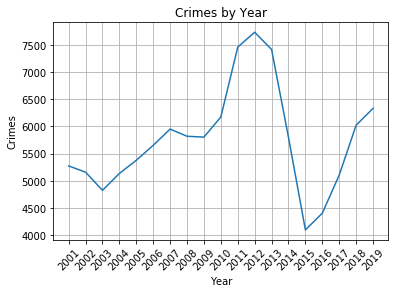

In [86]:
# Created list of project data by year
plot_year = [year_2001, year_2002, year_2003, year_2004, year_2005, year_2006, year_2007, year_2008, year_2009, year_2010, year_2011, year_2012, year_2013, year_2014, year_2015, year_2016, year_2017, year_2018, year_2019]

# Created empty list to append total crime count for that year
total_crime_year = []

# Created year list to plot 
year = [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

# For loop to add total crime count to list above
for x in range(19):
    total_crime_year.append(plot_year[x]["Primary Type"].count())

# Plotted year vs crime count 
plt.plot(year, total_crime_year)
plt.xticks(ticks = year, rotation = 45)
plt.ylabel("Crimes")
plt.xlabel("Year")
plt.title("Crimes by Year")
plt.grid()
plt.show()

In [74]:
# set ridership count for year to 0 
ridership_2001 = 0
ridership_2002 = 0
ridership_2003 = 0
ridership_2004 = 0
ridership_2005 = 0
ridership_2006 = 0
ridership_2007 = 0
ridership_2008 = 0
ridership_2009 = 0
ridership_2010 = 0
ridership_2011 = 0
ridership_2012 = 0
ridership_2013 = 0
ridership_2014 = 0
ridership_2015 = 0
ridership_2016 = 0
ridership_2017 = 0
ridership_2018 = 0
ridership_2019 = 0

#For loop to get total rider count for each year 
for x in range(cta_data["Total Rides"].count()):    
    if cta_data["Date"][x][6:10] == "2001":
        ridership_2001 += cta_data["Total Rides"][x]
    elif cta_data["Date"][x][6:10] == "2002":
        ridership_2002 += cta_data["Total Rides"][x]    
    elif cta_data["Date"][x][6:10] == "2003":
        ridership_2003 += cta_data["Total Rides"][x]
    elif cta_data["Date"][x][6:10] == "2004":
        ridership_2004 += cta_data["Total Rides"][x]
    elif cta_data["Date"][x][6:10] == "2005":
        ridership_2005 += cta_data["Total Rides"][x]
    elif cta_data["Date"][x][6:10] == "2006":
        ridership_2006 += cta_data["Total Rides"][x]
    elif cta_data["Date"][x][6:10] == "2007":
        ridership_2007 += cta_data["Total Rides"][x]
    elif cta_data["Date"][x][6:10] == "2008":
        ridership_2008 += cta_data["Total Rides"][x]
    elif cta_data["Date"][x][6:10] == "2009":
        ridership_2009 += cta_data["Total Rides"][x]
    elif cta_data["Date"][x][6:10] == "2010":
        ridership_2010 += cta_data["Total Rides"][x]
    elif cta_data["Date"][x][6:10] == "2011":
        ridership_2011 += cta_data["Total Rides"][x]
    elif cta_data["Date"][x][6:10] == "2012":
        ridership_2012 += cta_data["Total Rides"][x]
    elif cta_data["Date"][x][6:10] == "2013":
        ridership_2013 += cta_data["Total Rides"][x]
    elif cta_data["Date"][x][6:10] == "2014":
        ridership_2014 += cta_data["Total Rides"][x]
    elif cta_data["Date"][x][6:10] == "2015":
        ridership_2015 += cta_data["Total Rides"][x]
    elif cta_data["Date"][x][6:10] == "2016":
        ridership_2016 += cta_data["Total Rides"][x]
    elif cta_data["Date"][x][6:10] == "2017":
        ridership_2017 += cta_data["Total Rides"][x]
    elif cta_data["Date"][x][6:10] == "2018":
        ridership_2018 += cta_data["Total Rides"][x]
    elif cta_data["Date"][x][6:10] == "2019":
        ridership_2019 += cta_data["Total Rides"][x]

# Print rider count for each year
print(f'Total ridership in 2001: {ridership_2001}')
print(f'Total ridership in 2002: {ridership_2002}')
print(f'Total ridership in 2003: {ridership_2003}')
print(f'Total ridership in 2004: {ridership_2004}')
print(f'Total ridership in 2005: {ridership_2005}')
print(f'Total ridership in 2006: {ridership_2006}')
print(f'Total ridership in 2007: {ridership_2007}')
print(f'Total ridership in 2008: {ridership_2008}')
print(f'Total ridership in 2009: {ridership_2009}')
print(f'Total ridership in 2010: {ridership_2010}')
print(f'Total ridership in 2011: {ridership_2011}')
print(f'Total ridership in 2012: {ridership_2012}')
print(f'Total ridership in 2013: {ridership_2013}')
print(f'Total ridership in 2014: {ridership_2014}')
print(f'Total ridership in 2015: {ridership_2015}')
print(f'Total ridership in 2016: {ridership_2016}')
print(f'Total ridership in 2017: {ridership_2017}')
print(f'Total ridership in 2018: {ridership_2018}')
print(f'Total ridership in 2019: {ridership_2019}')

Total ridership in 2001: 483405757
Total ridership in 2002: 483701088
Total ridership in 2003: 472940755
Total ridership in 2004: 472747184
Total ridership in 2005: 490003697
Total ridership in 2006: 493602539
Total ridership in 2007: 499544722
Total ridership in 2008: 526336470
Total ridership in 2009: 521241827
Total ridership in 2010: 516873058
Total ridership in 2011: 579920253
Total ridership in 2012: 545577922
Total ridership in 2013: 528800772
Total ridership in 2014: 557616332
Total ridership in 2015: 515964835
Total ridership in 2016: 497704249
Total ridership in 2017: 479435223
Total ridership in 2018: 468067957
Total ridership in 2019: 455743540
Total ridership in 2020: 71992424


In [88]:
# Added ridership count for each year to list
ridership_count = [ridership_2001, ridership_2002, ridership_2003, ridership_2004, ridership_2005, ridership_2006, ridership_2007, ridership_2008, ridership_2009, ridership_2010, ridership_2011, ridership_2012, ridership_2013, ridership_2014, ridership_2015, ridership_2016, ridership_2017, ridership_2018, ridership_2019]

# Found total riders to ensure that rider aligns with rider count in cta_data (excluded 2020 year)
# Set ridership count to 0
total_ridership = 0
for x in range(19):
    total_ridership += ridership_count[x]

print(total_ridership)
cta_data["Total Rides"].sum()

9589228180


9661220604

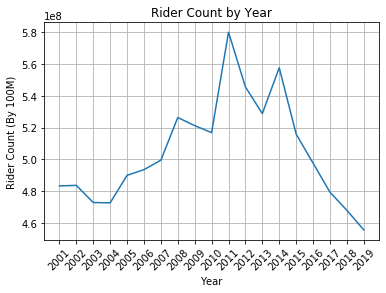

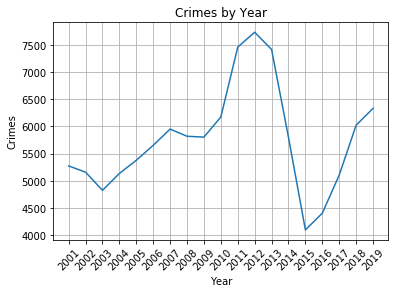

In [85]:
#Plot rider count vs year
plt.plot(year, ridership_count)
plt.xticks(ticks = year, rotation = 45)
plt.ylabel("Rider Count (By 100M)")
plt.xlabel("Year")
plt.title("Rider Count by Year")
plt.grid()
plt.show()

#Plot crimes vs year
plt.plot(year, total_crime_year)
plt.xticks(ticks = year, rotation = 45)
plt.ylabel("Crimes")
plt.xlabel("Year")
plt.title("Crimes by Year")
plt.grid()
plt.show()
